Task 

1.- Which stores are underperforming in terms of sales volume ?

2.- What count of transactions involved promotions ?

3.- What is the total revenue generated from sales during promotional events ?

4.- Which product see the largest increase in demand during holidays ?

5.- How does customer loyalty level affect purchasinng patterns ?

6.- Calculate the monthly sales and find out the trends ?

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv("Walmart.csv")

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          5000 non-null   int64  
 1   customer_id             5000 non-null   int64  
 2   product_id              5000 non-null   int64  
 3   product_name            5000 non-null   object 
 4   category                5000 non-null   object 
 5   quantity_sold           5000 non-null   int64  
 6   unit_price              5000 non-null   float64
 7   transaction_date        5000 non-null   object 
 8   store_id                5000 non-null   int64  
 9   store_location          5000 non-null   object 
 10  inventory_level         5000 non-null   int64  
 11  reorder_point           5000 non-null   int64  
 12  reorder_quantity        5000 non-null   int64  
 13  supplier_id             5000 non-null   int64  
 14  supplier_lead_time      5000 non-null   

In [32]:
#changing data type of "transaction_date"

df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [33]:
df.dtypes

transaction_id                     int64
customer_id                        int64
product_id                         int64
product_name                      object
category                          object
quantity_sold                      int64
unit_price                       float64
transaction_date          datetime64[ns]
store_id                           int64
store_location                    object
inventory_level                    int64
reorder_point                      int64
reorder_quantity                   int64
supplier_id                        int64
supplier_lead_time                 int64
customer_age                       int64
customer_gender                   object
customer_income                  float64
customer_loyalty_level            object
payment_method                    object
promotion_applied                   bool
promotion_type                    object
weather_conditions                object
holiday_indicator                   bool
weekday         

In [34]:
#to check the null values

df.isnull().sum()

transaction_id               0
customer_id                  0
product_id                   0
product_name                 0
category                     0
quantity_sold                0
unit_price                   0
transaction_date             0
store_id                     0
store_location               0
inventory_level              0
reorder_point                0
reorder_quantity             0
supplier_id                  0
supplier_lead_time           0
customer_age                 0
customer_gender              0
customer_income              0
customer_loyalty_level       0
payment_method               0
promotion_applied            0
promotion_type            3407
weather_conditions           0
holiday_indicator            0
weekday                      0
stockout_indicator           0
forecasted_demand            0
actual_demand                0
dtype: int64

In [35]:
df.head()


,transaction_id,customer_id,product_id,product_name,category,quantity_sold,unit_price,transaction_date,store_id,store_location,...,customer_loyalty_level,payment_method,promotion_applied,promotion_type,weather_conditions,holiday_indicator,weekday,stockout_indicator,forecasted_demand,actual_demand
0,1,2824,843,Fridge,Electronics,3,188.46,2024-03-31 21:46:00,3,"Miami, FL",...,Silver,Credit Card,True,NaN,Stormy,False,Friday,True,172,179
1,2,1409,135,TV,Electronics,4,1912.04,2024-07-28 12:45:00,5,"Dallas, TX",...,Gold,Cash,True,Percentage Discount,Rainy,False,Monday,True,109,484
2,3,5506,391,Fridge,Electronics,4,1377.75,2024-06-10 04:55:00,1,"Los Angeles, CA",...,Platinum,Cash,False,NaN,Sunny,False,Tuesday,True,289,416
3,4,5012,710,Smartphone,Electronics,5,182.31,2024-08-15 01:03:00,5,"Miami, FL",...,Silver,Cash,True,Percentage Discount,Sunny,True,Sunday,False,174,446
4,5,4657,116,Laptop,Electronics,3,499.28,2024-09-13 00:45:00,6,"Chicago, IL",...,Bronze,Digital Wallet,False,NaN,Sunny,False,Thursday,True,287,469


In [36]:
#To check unique value in "promotion_type"

df['promotion_type'].unique()

array([nan, 'Percentage Discount', 'BOGO'], dtype=object)

In [37]:
#Filling null values by none in 'promotion_type'


df['promotion_type'] = df['promotion_type'].fillna('none')

In [38]:
df.head()

,transaction_id,customer_id,product_id,product_name,category,quantity_sold,unit_price,transaction_date,store_id,store_location,...,customer_loyalty_level,payment_method,promotion_applied,promotion_type,weather_conditions,holiday_indicator,weekday,stockout_indicator,forecasted_demand,actual_demand
0,1,2824,843,Fridge,Electronics,3,188.46,2024-03-31 21:46:00,3,"Miami, FL",...,Silver,Credit Card,True,none,Stormy,False,Friday,True,172,179
1,2,1409,135,TV,Electronics,4,1912.04,2024-07-28 12:45:00,5,"Dallas, TX",...,Gold,Cash,True,Percentage Discount,Rainy,False,Monday,True,109,484
2,3,5506,391,Fridge,Electronics,4,1377.75,2024-06-10 04:55:00,1,"Los Angeles, CA",...,Platinum,Cash,False,none,Sunny,False,Tuesday,True,289,416
3,4,5012,710,Smartphone,Electronics,5,182.31,2024-08-15 01:03:00,5,"Miami, FL",...,Silver,Cash,True,Percentage Discount,Sunny,True,Sunday,False,174,446
4,5,4657,116,Laptop,Electronics,3,499.28,2024-09-13 00:45:00,6,"Chicago, IL",...,Bronze,Digital Wallet,False,none,Sunny,False,Thursday,True,287,469


In [39]:
#Store Performance Analysis In Terms Of Sales


sales_by_store = df.groupby('store_id')['quantity_sold'].sum().sort_values()

sales_by_store

store_id
6     658
4     685
7     713
14    713
12    714
18    730
3     732
16    738
17    740
19    749
10    749
9     749
15    760
11    761
2     765
1     780
20    781
5     791
8     793
13    813
Name: quantity_sold, dtype: int64

In [40]:
#Setting a level for underperforming stores (below median of "sales_by_store" data set)


thershold = sales_by_store.median()

under_performing_stores = sales_by_store[sales_by_store < thershold]

under_performing_stores

store_id
6     658
4     685
7     713
14    713
12    714
18    730
3     732
16    738
17    740
Name: quantity_sold, dtype: int64

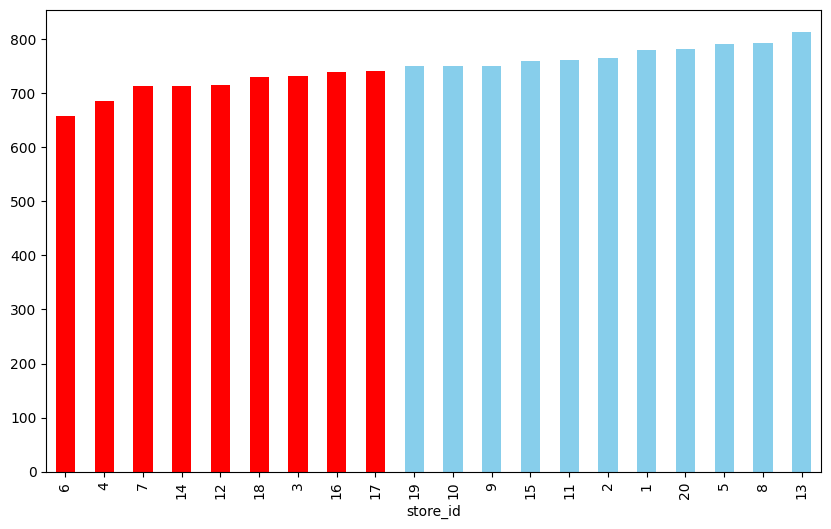

In [41]:
#Under performing stores are shown in red bar.

plt.figure(figsize=(10,6))
colors = ['red' if store in under_performing_stores else 'skyblue' for store in sales_by_store.index]
#for index, value in enumerate(sales_by_store):
    #level = "Under P" if value<749 else "High P" 
    #plt.text(index, value+1, f"{level}" , ha="left")
bars = sales_by_store.plot(kind='bar', color=colors)

In [42]:
df.head()

,transaction_id,customer_id,product_id,product_name,category,quantity_sold,unit_price,transaction_date,store_id,store_location,...,customer_loyalty_level,payment_method,promotion_applied,promotion_type,weather_conditions,holiday_indicator,weekday,stockout_indicator,forecasted_demand,actual_demand
0,1,2824,843,Fridge,Electronics,3,188.46,2024-03-31 21:46:00,3,"Miami, FL",...,Silver,Credit Card,True,none,Stormy,False,Friday,True,172,179
1,2,1409,135,TV,Electronics,4,1912.04,2024-07-28 12:45:00,5,"Dallas, TX",...,Gold,Cash,True,Percentage Discount,Rainy,False,Monday,True,109,484
2,3,5506,391,Fridge,Electronics,4,1377.75,2024-06-10 04:55:00,1,"Los Angeles, CA",...,Platinum,Cash,False,none,Sunny,False,Tuesday,True,289,416
3,4,5012,710,Smartphone,Electronics,5,182.31,2024-08-15 01:03:00,5,"Miami, FL",...,Silver,Cash,True,Percentage Discount,Sunny,True,Sunday,False,174,446
4,5,4657,116,Laptop,Electronics,3,499.28,2024-09-13 00:45:00,6,"Chicago, IL",...,Bronze,Digital Wallet,False,none,Sunny,False,Thursday,True,287,469


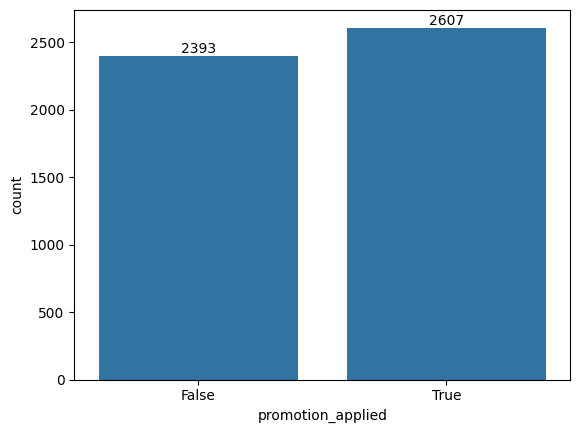

In [43]:
#Transactions involved promotions.


ax=sns.countplot(x='promotion_applied', data=df)

#for showing values over bars
for bar in ax.containers:
    ax.bar_label(bar)

In [44]:
df.head()

,transaction_id,customer_id,product_id,product_name,category,quantity_sold,unit_price,transaction_date,store_id,store_location,...,customer_loyalty_level,payment_method,promotion_applied,promotion_type,weather_conditions,holiday_indicator,weekday,stockout_indicator,forecasted_demand,actual_demand
0,1,2824,843,Fridge,Electronics,3,188.46,2024-03-31 21:46:00,3,"Miami, FL",...,Silver,Credit Card,True,none,Stormy,False,Friday,True,172,179
1,2,1409,135,TV,Electronics,4,1912.04,2024-07-28 12:45:00,5,"Dallas, TX",...,Gold,Cash,True,Percentage Discount,Rainy,False,Monday,True,109,484
2,3,5506,391,Fridge,Electronics,4,1377.75,2024-06-10 04:55:00,1,"Los Angeles, CA",...,Platinum,Cash,False,none,Sunny,False,Tuesday,True,289,416
3,4,5012,710,Smartphone,Electronics,5,182.31,2024-08-15 01:03:00,5,"Miami, FL",...,Silver,Cash,True,Percentage Discount,Sunny,True,Sunday,False,174,446
4,5,4657,116,Laptop,Electronics,3,499.28,2024-09-13 00:45:00,6,"Chicago, IL",...,Bronze,Digital Wallet,False,none,Sunny,False,Thursday,True,287,469


In [45]:
#Total revenue during promotional events.

#creating new column of revenue.

df['revenue'] = df['quantity_sold']*df['unit_price']


In [46]:
#total revenue during promotional events.

df[df['promotion_applied']==True]['revenue'].sum()

np.float64(8062411.030000001)

In [47]:
df.head()

,transaction_id,customer_id,product_id,product_name,category,quantity_sold,unit_price,transaction_date,store_id,store_location,...,payment_method,promotion_applied,promotion_type,weather_conditions,holiday_indicator,weekday,stockout_indicator,forecasted_demand,actual_demand,revenue
0,1,2824,843,Fridge,Electronics,3,188.46,2024-03-31 21:46:00,3,"Miami, FL",...,Credit Card,True,none,Stormy,False,Friday,True,172,179,565.38
1,2,1409,135,TV,Electronics,4,1912.04,2024-07-28 12:45:00,5,"Dallas, TX",...,Cash,True,Percentage Discount,Rainy,False,Monday,True,109,484,7648.16
2,3,5506,391,Fridge,Electronics,4,1377.75,2024-06-10 04:55:00,1,"Los Angeles, CA",...,Cash,False,none,Sunny,False,Tuesday,True,289,416,5511.00
3,4,5012,710,Smartphone,Electronics,5,182.31,2024-08-15 01:03:00,5,"Miami, FL",...,Cash,True,Percentage Discount,Sunny,True,Sunday,False,174,446,911.55
4,5,4657,116,Laptop,Electronics,3,499.28,2024-09-13 00:45:00,6,"Chicago, IL",...,Digital Wallet,False,none,Sunny,False,Thursday,True,287,469,1497.84


In [48]:
#products demand in holidays


holiday_sales = df[df['holiday_indicator']==True]      #filter data for holidays

holiday_demand=holiday_sales.groupby('product_name')['quantity_sold'].sum()

holiday_demand

product_name
Camera              934
Fridge              948
Headphones          881
Laptop              871
Smartphone         1018
TV                  926
Tablet             1005
Washing Machine     873
Name: quantity_sold, dtype: int64

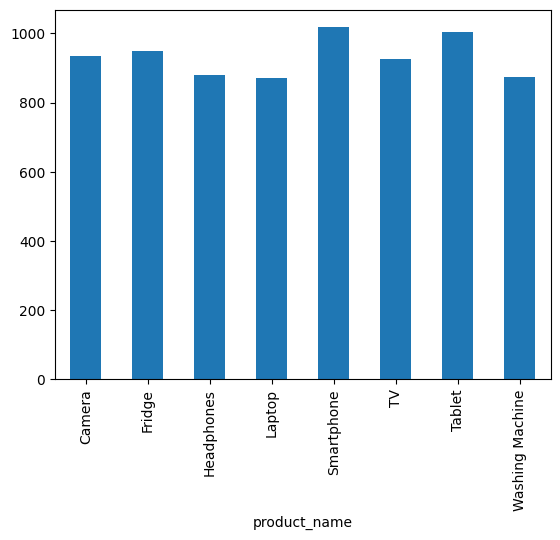

In [49]:
ax = holiday_demand.plot(kind='bar')

In [50]:
df.head()

,transaction_id,customer_id,product_id,product_name,category,quantity_sold,unit_price,transaction_date,store_id,store_location,...,payment_method,promotion_applied,promotion_type,weather_conditions,holiday_indicator,weekday,stockout_indicator,forecasted_demand,actual_demand,revenue
0,1,2824,843,Fridge,Electronics,3,188.46,2024-03-31 21:46:00,3,"Miami, FL",...,Credit Card,True,none,Stormy,False,Friday,True,172,179,565.38
1,2,1409,135,TV,Electronics,4,1912.04,2024-07-28 12:45:00,5,"Dallas, TX",...,Cash,True,Percentage Discount,Rainy,False,Monday,True,109,484,7648.16
2,3,5506,391,Fridge,Electronics,4,1377.75,2024-06-10 04:55:00,1,"Los Angeles, CA",...,Cash,False,none,Sunny,False,Tuesday,True,289,416,5511.00
3,4,5012,710,Smartphone,Electronics,5,182.31,2024-08-15 01:03:00,5,"Miami, FL",...,Cash,True,Percentage Discount,Sunny,True,Sunday,False,174,446,911.55
4,5,4657,116,Laptop,Electronics,3,499.28,2024-09-13 00:45:00,6,"Chicago, IL",...,Digital Wallet,False,none,Sunny,False,Thursday,True,287,469,1497.84


In [51]:
df['customer_loyalty_level']

0         Silver
1           Gold
2       Platinum
3         Silver
4         Bronze
          ...   
4995        Gold
4996      Bronze
4997      Bronze
4998      Silver
4999    Platinum
Name: customer_loyalty_level, Length: 5000, dtype: object

In [52]:
#Customer's loyalty 


loyalty_analysis= df.groupby('customer_loyalty_level').agg({
    'revenue':['sum','mean'],
    'customer_id' : 'nunique',
    'transaction_id':'count'})

#for sorting by 'revenue'(sum) in descending order

loyalty_analysis_sorted=loyalty_analysis.sort_values(by=('revenue','sum'),ascending=False)
loyalty_analysis_sorted

revenue              customer_id transaction_id
                               sum         mean     nunique          count
customer_loyalty_level                                                    
Platinum                4012963.14  3089.271085        1213           1299
Silver                  3918576.32  3042.372919        1211           1288
Bronze                  3795198.45  3028.889425        1161           1253
Gold                    3536863.54  3049.020293        1077           1160

In [53]:
#Monthly Sales and trends

#creating new columns of month name and month number.

df['Month Name'] = df['transaction_date'].dt.month_name()
df['Month Number'] = df['transaction_date'].dt.month

df.dtypes




transaction_id                     int64
customer_id                        int64
product_id                         int64
product_name                      object
category                          object
quantity_sold                      int64
unit_price                       float64
transaction_date          datetime64[ns]
store_id                           int64
store_location                    object
inventory_level                    int64
reorder_point                      int64
reorder_quantity                   int64
supplier_id                        int64
supplier_lead_time                 int64
customer_age                       int64
customer_gender                   object
customer_income                  float64
customer_loyalty_level            object
payment_method                    object
promotion_applied                   bool
promotion_type                    object
weather_conditions                object
holiday_indicator                   bool
weekday         

In [54]:
df.head()

,transaction_id,customer_id,product_id,product_name,category,quantity_sold,unit_price,transaction_date,store_id,store_location,...,promotion_type,weather_conditions,holiday_indicator,weekday,stockout_indicator,forecasted_demand,actual_demand,revenue,Month Name,Month Number
0,1,2824,843,Fridge,Electronics,3,188.46,2024-03-31 21:46:00,3,"Miami, FL",...,none,Stormy,False,Friday,True,172,179,565.38,March,3
1,2,1409,135,TV,Electronics,4,1912.04,2024-07-28 12:45:00,5,"Dallas, TX",...,Percentage Discount,Rainy,False,Monday,True,109,484,7648.16,July,7
2,3,5506,391,Fridge,Electronics,4,1377.75,2024-06-10 04:55:00,1,"Los Angeles, CA",...,none,Sunny,False,Tuesday,True,289,416,5511.00,June,6
3,4,5012,710,Smartphone,Electronics,5,182.31,2024-08-15 01:03:00,5,"Miami, FL",...,Percentage Discount,Sunny,True,Sunday,False,174,446,911.55,August,8
4,5,4657,116,Laptop,Electronics,3,499.28,2024-09-13 00:45:00,6,"Chicago, IL",...,none,Sunny,False,Thursday,True,287,469,1497.84,September,9


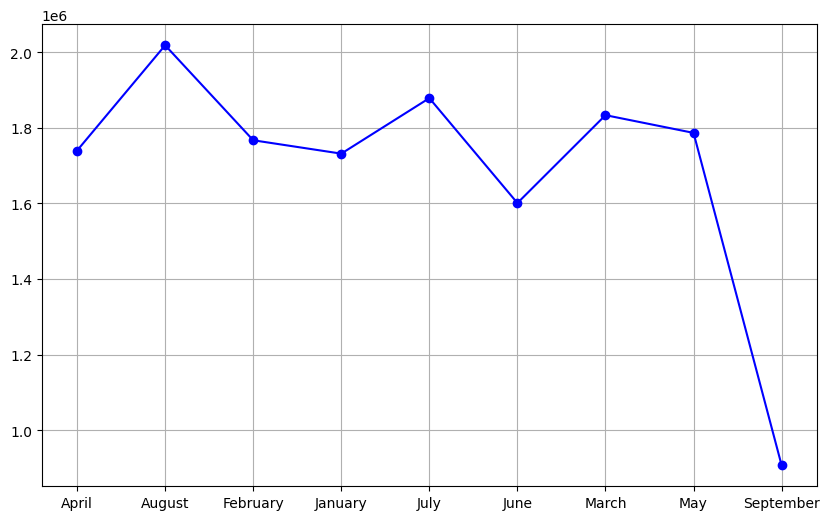

In [55]:
#trend 

monthly_revenue = df.groupby('Month Name')['revenue'].sum().reset_index()

plt.figure(figsize=(10,6))

# for ploting the trend line


#graph = monthly_revenue.plot(kind= 'line' ,marker='o',color='b')
plt.plot(monthly_revenue['Month Name'],monthly_revenue['revenue'],marker='o',color='b')
plt.grid()


Conclusion

1.- Stores with id 6,4,7,14,12,18,3,16,17 are in underperforming.

2.- 2607 transactions invalve promotions.

3.- Total revenue during promotion event is 8062411.0300000 .

4.- Smart phones and tablets are seen in highest demand during holidays.

5.- Platinum card holders gives more revenue.

6.- Trend drawn